#### Heart Failure Assignment 

##### Aim:
Create a model for predicting mortality by Heart Failure

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.

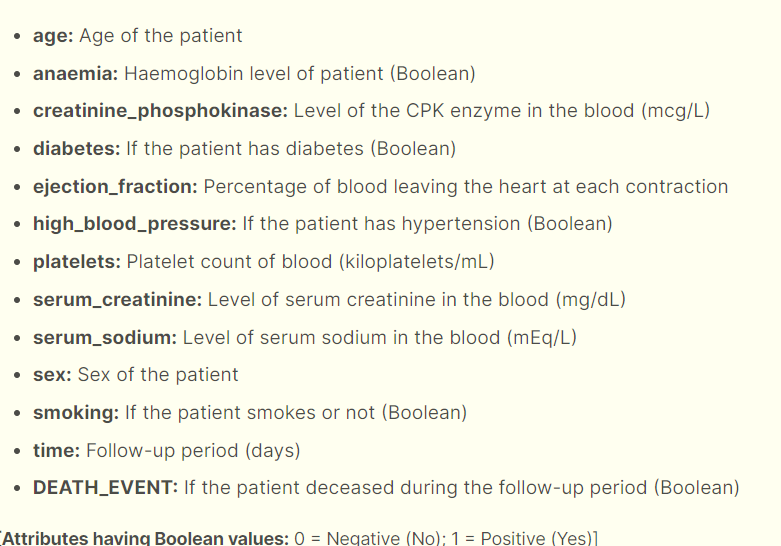

In [1]:
from IPython.display import Image
Image("description of variables.png")

Import all the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_confusion_matrix
import streamlit as st
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from statsmodels import robust
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron


## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



Load the data

In [3]:
heart_failure = pd.read_csv("heart_failure_clinical_records_dataset.csv")
heart_failure

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Explore the data

In [4]:
heart_failure['DEATH_EVENT'].value_counts() # count the outcomes as death event

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [5]:
heart_failure.info() # Information about each types of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
heart_failure.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
heart_failure.isnull().sum() # No missing data great, 

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Descriptive statistics 

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'anaemia'}>,
        <AxesSubplot: title={'center': 'creatinine_phosphokinase'}>,
        <AxesSubplot: title={'center': 'diabetes'}>],
       [<AxesSubplot: title={'center': 'ejection_fraction'}>,
        <AxesSubplot: title={'center': 'high_blood_pressure'}>,
        <AxesSubplot: title={'center': 'platelets'}>,
        <AxesSubplot: title={'center': 'serum_creatinine'}>],
       [<AxesSubplot: title={'center': 'serum_sodium'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'smoking'}>,
        <AxesSubplot: title={'center': 'time'}>],
       [<AxesSubplot: title={'center': 'DEATH_EVENT'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

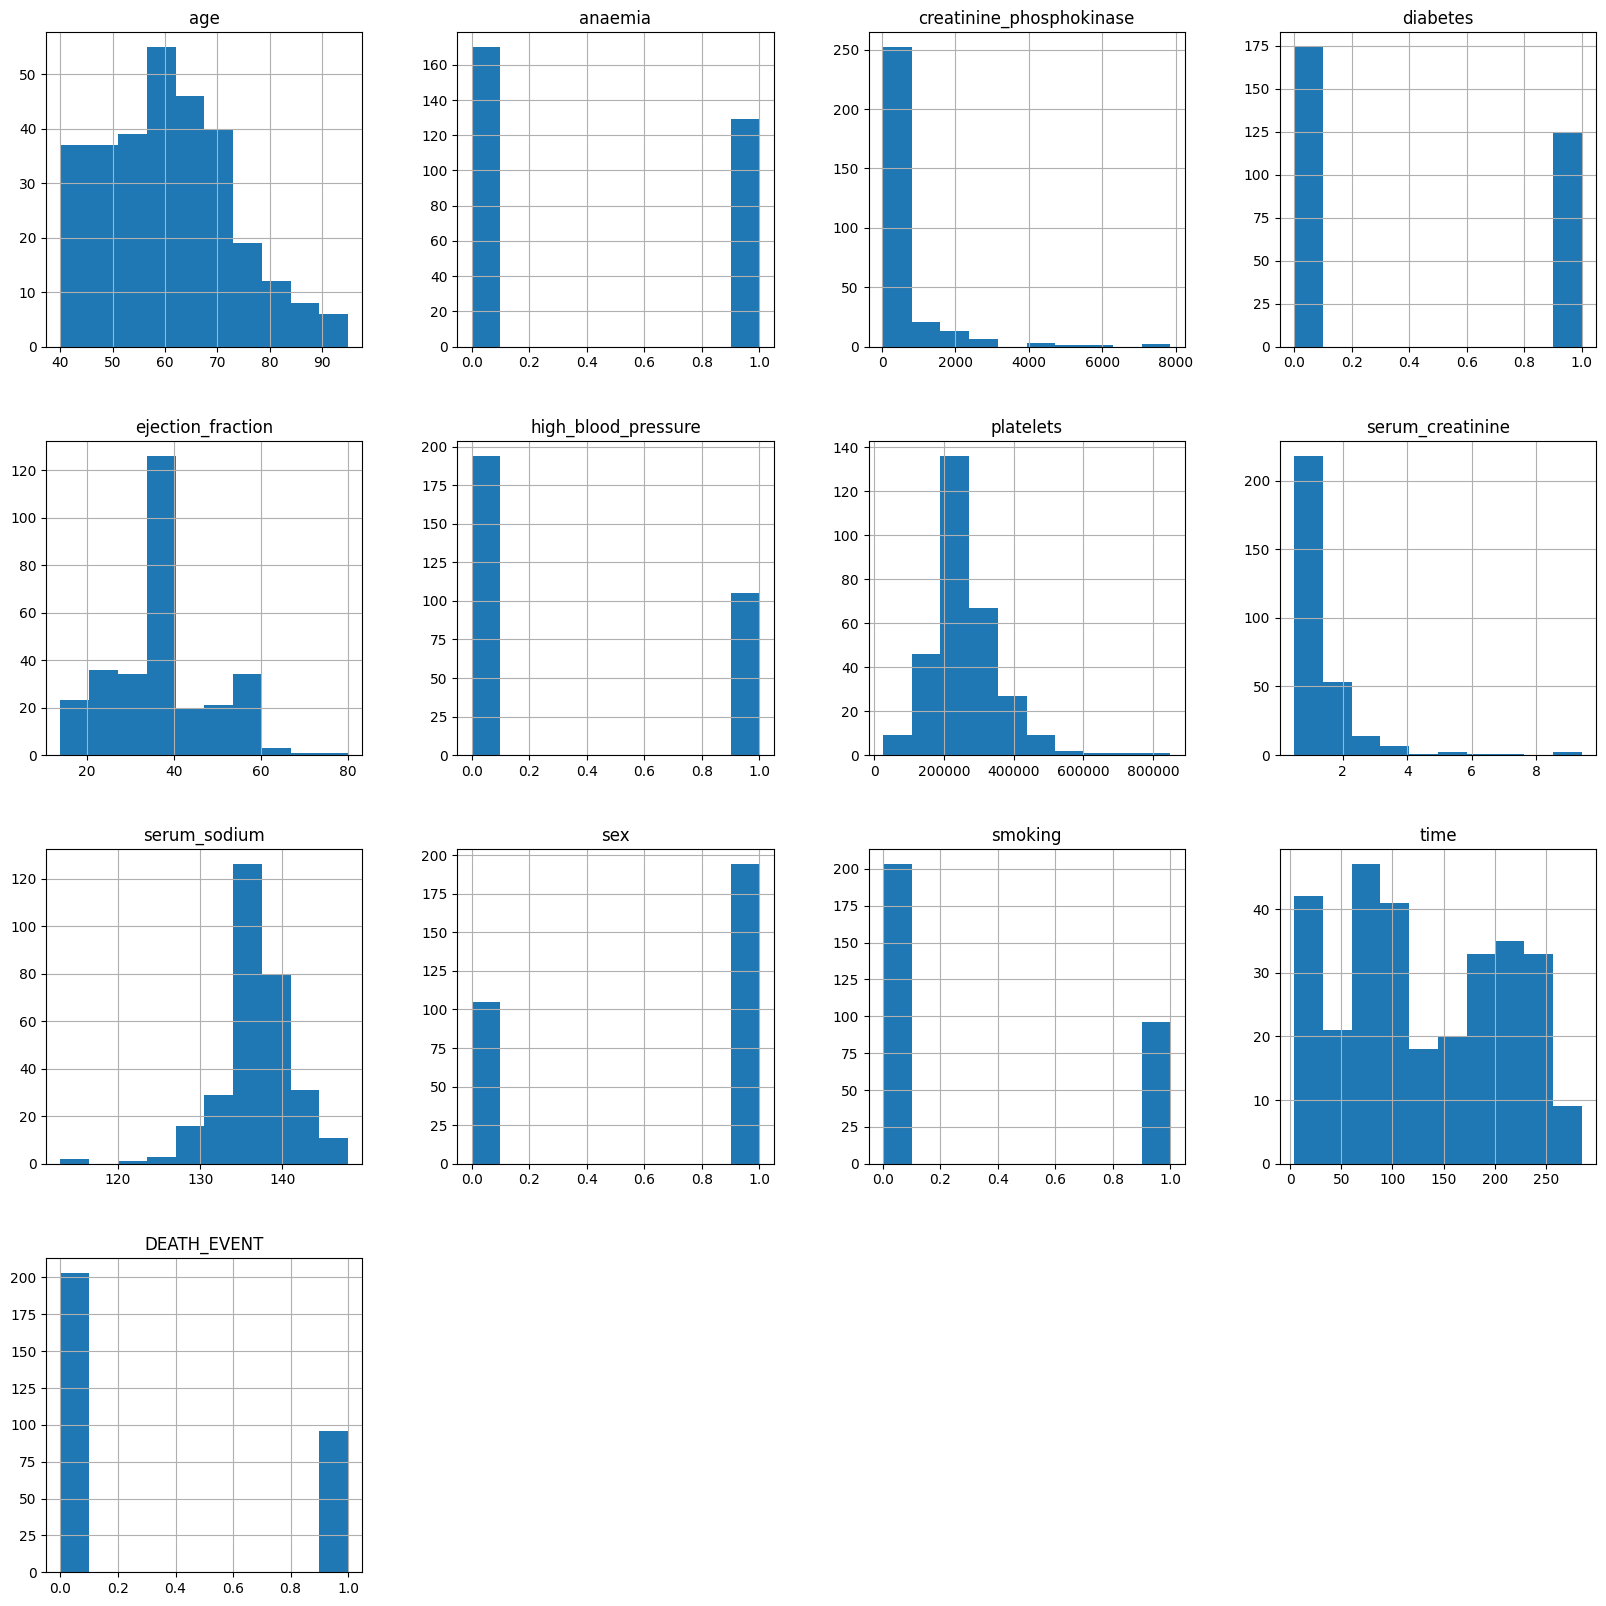

In [8]:
heart_failure.hist(bins =10, figsize=(20,20))


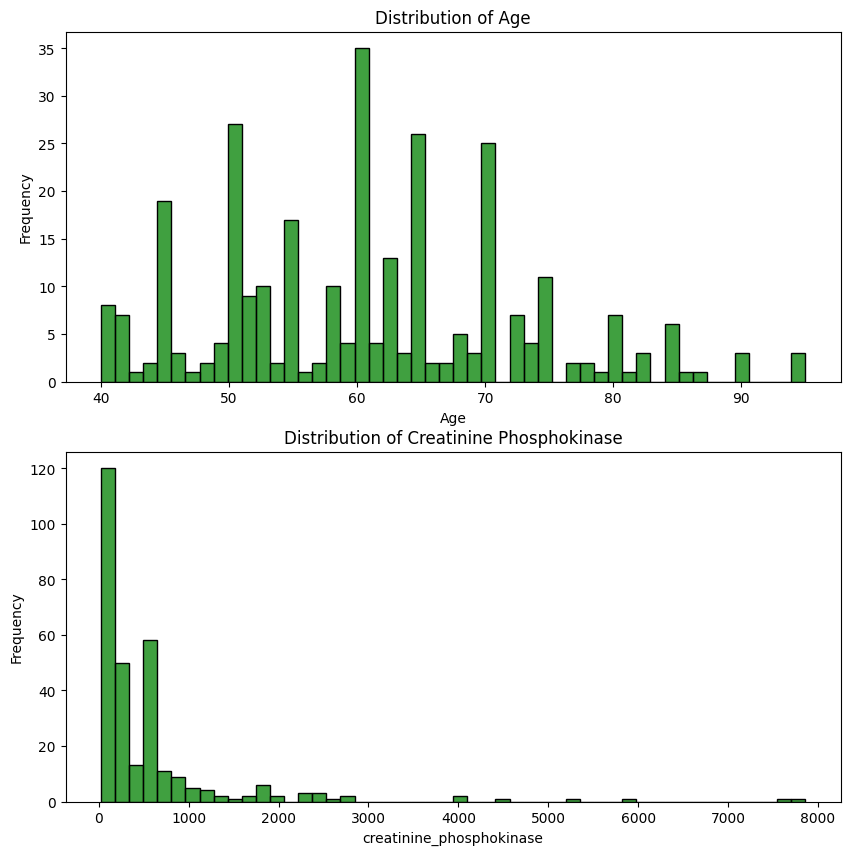

In [9]:
# Create a new figure and set the figure size
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

# Generate histograms of Age and Fare variables using Seaborn
sns.histplot(data=heart_failure, x='age', bins=50,color="green",ax=axes[0])
sns.histplot(data=heart_failure, x='creatinine_phosphokinase', bins=50,color="green",ax=axes[1])


# Set titles and labels for each subplot
axes[0].set_title('Distribution of Age')
axes[1].set_title('Distribution of Creatinine Phosphokinase')

axes[0].set_xlabel('Age')
axes[1].set_xlabel('creatinine_phosphokinase')

axes[0].set_ylabel('Frequency')
axes[1].set_ylabel('Frequency')


# Display the plot
plt.show()

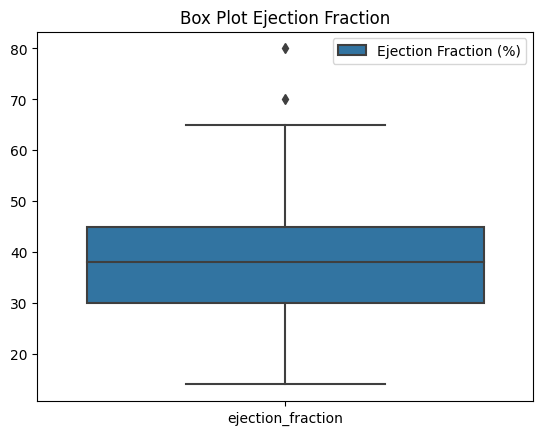

In [10]:
sns.boxplot(data=heart_failure[[ "ejection_fraction"]])
plt.title('Box Plot Ejection Fraction', loc="center")
# Add a legend for the units of each variable
plt.legend(labels=['Ejection Fraction (%)'], loc='upper right')
plt.gca().set_facecolor('none') # para tirar a linhas cizentas

Create another category: name HF Class depending on the ejection fraction
This will be based on the definition of heart failure (European Guidelines)


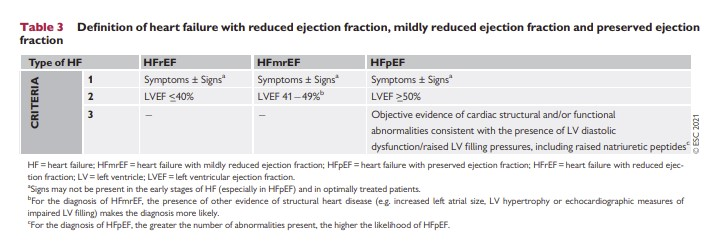

In [11]:
from IPython.display import Image
Image("classificationeuropean.jpg")


In [12]:
#Create a Data Frame with categorical variable 
## define te bins and labels for the categories

heart_failure_type = pd.cut(heart_failure.ejection_fraction,bins= [0,41,50,100],labels = ['Heart Failure with reduced ejection fraction','Heart Failure with mildly reduced ejection fraction','Heart Failure with preserved ejection fraction'])
heart_failure.insert(4, 'Type of heart failure',heart_failure_type)


In [13]:
heart_failure.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,Type of heart failure,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
191,64.0,1,62,0,Heart Failure with preserved ejection fraction,60,0,309000.0,1.50,135,0,0,174,0
56,70.0,1,75,0,Heart Failure with reduced ejection fraction,35,0,223000.0,2.70,138,1,1,54,0
69,65.0,0,113,1,Heart Failure with reduced ejection fraction,25,0,497000.0,1.83,135,1,0,67,1
151,62.0,0,30,1,Heart Failure with preserved ejection fraction,60,1,244000.0,0.90,139,1,0,117,0
167,59.0,0,66,1,Heart Failure with reduced ejection fraction,20,0,70000.0,2.40,134,1,0,135,1


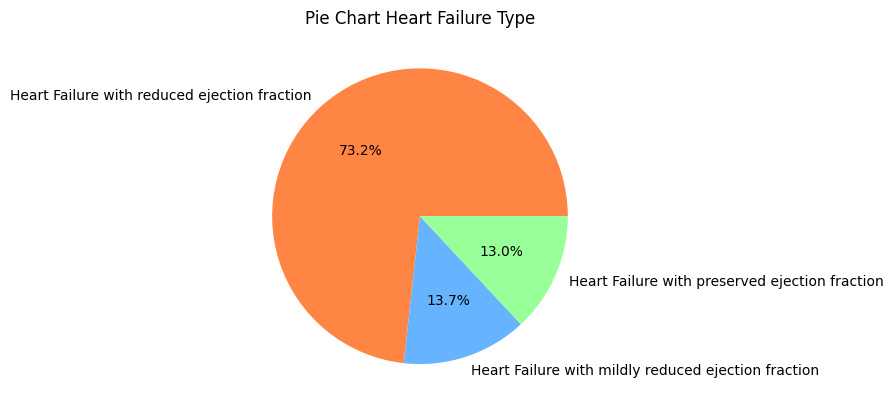

In [14]:
# Create a pandas series containing the data
data = heart_failure['Type of heart failure'].value_counts() # data is a pandas series containing the counts of each type of network transmiting earthquake

# Create the pie chart
colors = ["#ff8545","#66b3ff","#99ff99","#ffcc99"]
#autopct parameter is used to format the values of the chart, in this case it is showing the percentage with one decimal point.
explode = [ 1 if i < 0.1 else 0 for i in data/data.sum()]
plt.pie(data, labels=data.index, autopct='%1.1f%%',colors=colors,explode = explode) #labels parameter is used to provide the categories of the data, in this case the different types of networks

plt.title('Pie Chart Heart Failure Type', loc="center")
plt.show()

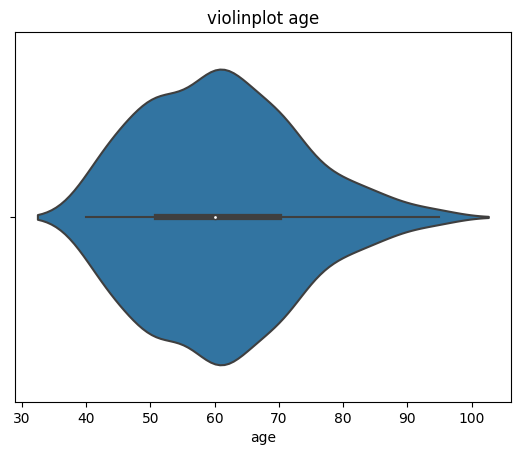

In [15]:
sns.violinplot(x=heart_failure["age"])
plt.title('violinplot age', loc="center")
plt.show()

<AxesSubplot: xlabel='age', ylabel='Type of heart failure'>

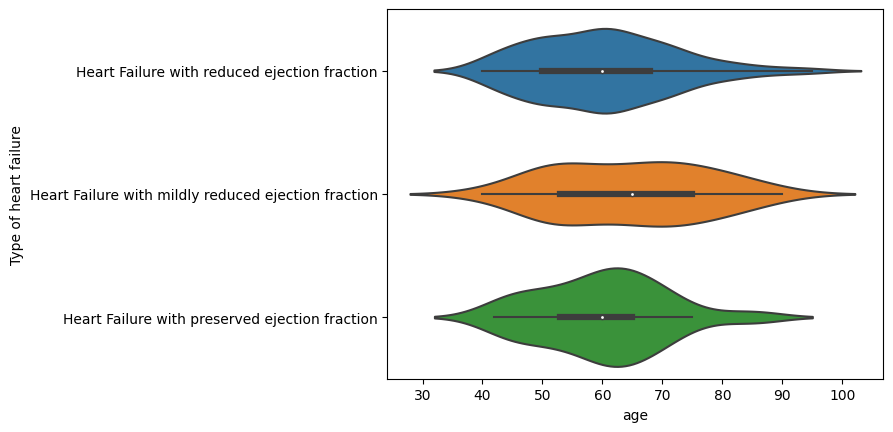

In [16]:
sns.violinplot(data=heart_failure, x="age", y="Type of heart failure")

In [17]:
corr_matrix = heart_failure.corr()
corr_matrix["DEATH_EVENT"].sort_values(ascending=False)

C:\Users\jlapa\AppData\Local\Temp\ipykernel_13740\604316067.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = heart_failure.corr()


DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

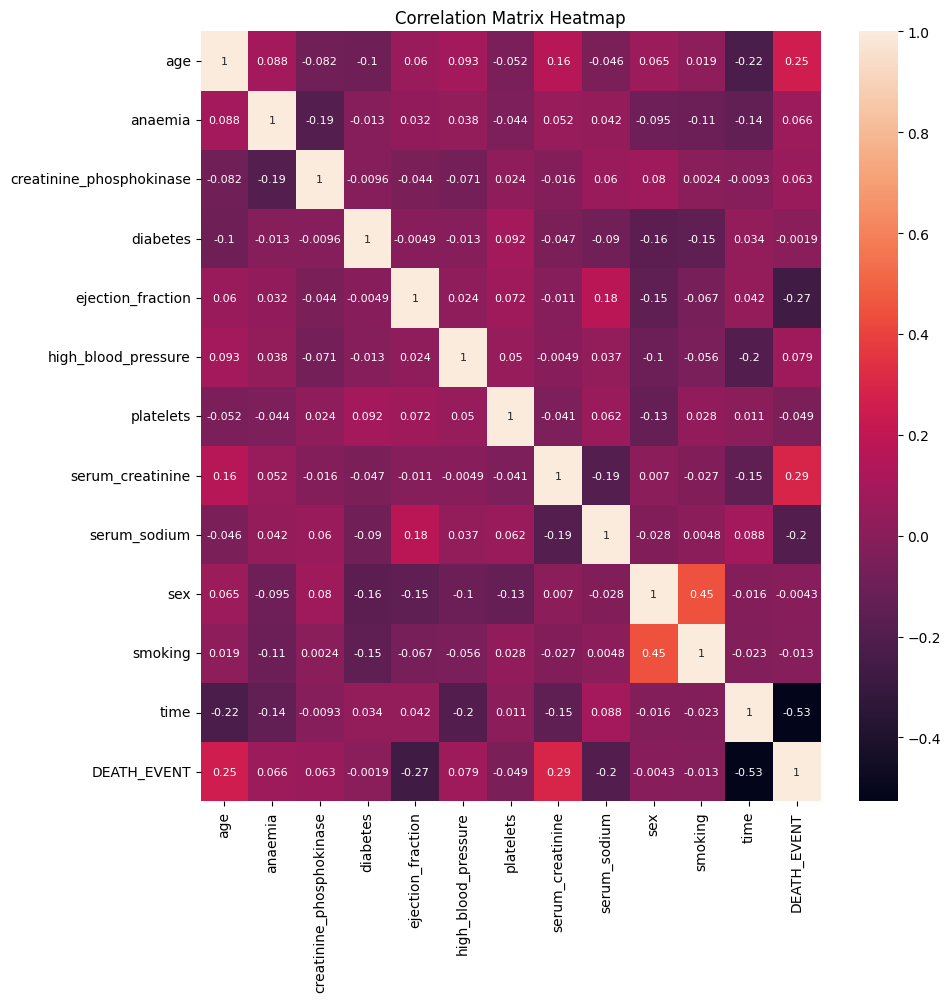

In [18]:
plt.figure(figsize=(10,10)) #to increase the size of the figure
sns.heatmap(corr_matrix, annot=True, annot_kws={'size': 8})
plt.title("Correlation Matrix Heatmap", loc="center")

# Neural Networks with Keras

My questions before I start to do the Neural network model are the following:

First: How do I prepare data? Do I need to normalize data or will I loose important outliers information?

Answer (by chat GPT): Normalizing data with outliers can depend on the specific requirements of your neural network and the nature of your data. However, as a general rule, it is often a good idea to normalize your data, regardless of whether it contains outliers or not, before using it as input to a neural network.

Normalization is a process of scaling the input features so that they have similar ranges and variances. This helps the neural network to learn more efficiently and to avoid getting stuck in local optima during the training process. Normalization can also improve the stability and generalization of the neural network by reducing the impact of outliers.

However, when your data contains outliers, normalizing can be challenging since the outliers can have a significant impact on the mean and standard deviation of the data. One approach to handling this is to use robust normalization techniques that are less sensitive to outliers. One such technique is the Median Absolute Deviation (MAD) normalization, which scales the data based on the median and the median absolute deviation of the data, rather than the mean and standard deviation.

In summary, normalizing data can be beneficial for neural networks, even when it contains outliers. However, it is important to use robust normalization techniques that can handle outliers appropriately.


Plan: Try and normalise with Median Absolute Deviation (MAD)

2 Questions: Do I need to have all data numerical?
answer: yes, so I might need to transform data

3 Question: How to encoed variable for neural networks?
Answer (Chat GPT):There are several ways to encode categorical variables for neural networks, but the most commonly used methods are:

One-Hot Encoding: This is the most popular method for encoding categorical variables in neural networks. In this method, each category is represented as a binary vector, where each element of the vector corresponds to a category. For example, if you have a categorical variable called "color" with three categories (red, green, and blue), then the one-hot encoding will represent them as [1, 0, 0], [0, 1, 0], and [0, 0, 1], respectively.

Label Encoding: In this method, each category is assigned a unique integer value. For example, if you have a categorical variable called "color" with three categories (red, green, and blue), then the label encoding will represent them as 1, 2, and 3, respectively.

Embedding: Embedding is a more advanced method that represents each category as a dense vector of a fixed length. The embedding vectors are learned during the training process and can capture the relationships between categories. This method is particularly useful when dealing with large categorical variables with a large number of categories.

When choosing an encoding method, it is important to consider the nature of the data and the specific requirements of the neural network being used. In general, one-hot encoding is a safe choice and works well for most applications, but embedding may be more appropriate for more complex tasks.

Plan: Use one hot encoding

In [19]:
heart_failure['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [20]:
#calculate MAD for all columns
heart_failure[['age','anaemia','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']].apply(robust.mad)


age                            14.826022
anaemia                         0.000000
creatinine_phosphokinase      269.833604
ejection_fraction              11.860818
platelets                   65234.497614
serum_creatinine                0.296520
serum_sodium                    4.447807
time                          105.264758
dtype: float64

The output you obtained by applying the Median Absolute Deviation (MAD) to the columns of the "heart_failure" dataset provides an estimate of the variability of each variable that is robust to outliers. Here's how you can interpret the results:

"age": The MAD for age is 14.83, which means that the median absolute deviation of age from its median is 14.83. This indicates that the age variable has relatively low variability.

"anaemia": The MAD for anaemia is 0, which means that there is no variability in this variable. This may indicate that the variable has a very low number of unique values or that all of its values are identical.

"creatinine_phosphokinase": The MAD for creatinine_phosphokinase is 269.83, which means that this variable has relatively high variability. This is expected since the distribution of this variable is likely to be highly skewed and contain outliers.

"ejection_fraction": The MAD for ejection_fraction is 11.86, which indicates that the ejection_fraction variable has relatively low variability.

"platelets": The MAD for platelets is 65234.5, which indicates that this variable has relatively high variability.

"serum_creatinine": The MAD for serum_creatinine is 0.2965, which indicates that this variable has relatively low variability.

"serum_sodium": The MAD for serum_sodium is 4.45, which indicates that this variable has relatively low variability.

"time": The MAD for time is 105.26, which indicates that this variable has relatively high variability.

In summary, the MAD estimates the variability of the variables in the dataset, and the results can help you understand which variables have high or low variability, and which may contain outliers. However, it's important to interpret these results in the context of the specific dataset and the research question at hand.

Should I normalise creatinine, time and platelets? 

-It depends of our reserach question. We might loose some informations.
-I think I need to see the data again.


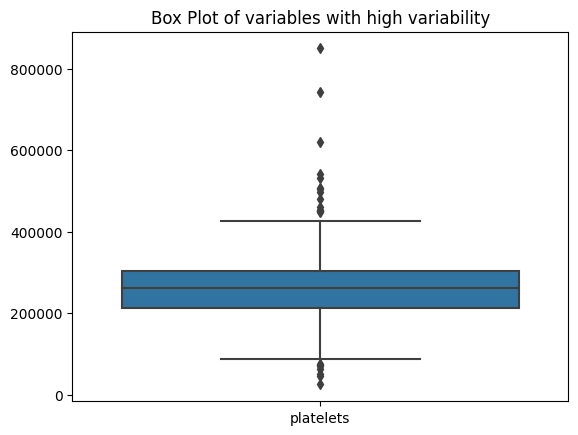

In [21]:
sns.boxplot(data=heart_failure[["platelets"]])
plt.title('Box Plot of variables with high variability', loc="center")
# Add a legend for the units of each variable
plt.gca().set_facecolor('none') # para tirar a linhas cizentas

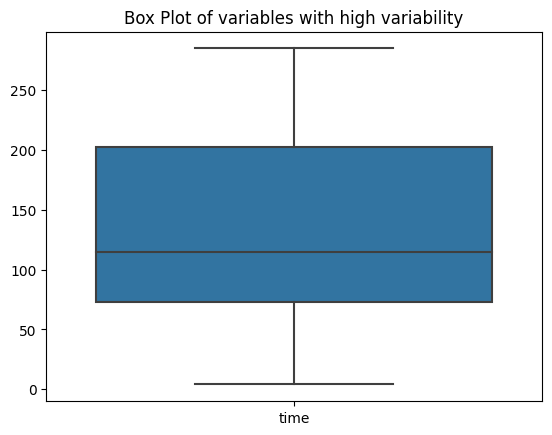

In [22]:
sns.boxplot(data=heart_failure[['time']])
plt.title('Box Plot of variables with high variability', loc="center")
# Add a legend for the units of each variable
plt.gca().set_facecolor('none') # para tirar a linhas cizentas

#For time it doesn't look necessary

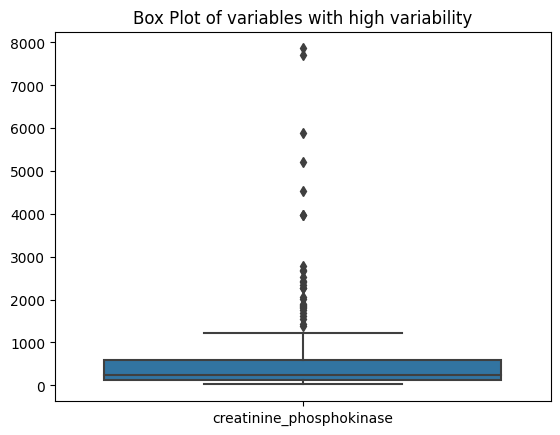

In [23]:
sns.boxplot(data=heart_failure[["creatinine_phosphokinase"]])
plt.title('Box Plot of variables with high variability', loc="center")
# Add a legend for the units of each variable
plt.gca().set_facecolor('none') # para tirar a linhas cizentas

##it looks that this is possible, so perphaps should we leave it? 

so if the outliers are important because they indicate deterioration and represent higher risk of the outcome should I normalise mediam absolute deviation?

If outliers are important and meaningful for your analysis because they represent a higher risk of the outcome or a deterioration of the patient's health, then normalizing based on the median absolute deviation (MAD) may not be the best approach. The MAD is a robust measure of variability that is less sensitive to outliers than other measures, but it still considers outliers in its calculation.

If you want to keep the information provided by the outliers, you could consider alternative normalization methods that do not reduce the impact of outliers, such as min-max scaling or z-score normalization. However, keep in mind that these methods may result in some distortion of the original data distribution, particularly if the outliers are extreme.

Another option is to keep the original values without normalization and include them as additional features in your analysis. For example, you could include the original creatinine, platelets, and time values in addition to the normalized versions, allowing the neural network to weigh the importance of each feature according to the specific research question.

Ultimately, the best approach depends on the specific research question, the nature of the data, and the goals of the analysis. It's important to carefully consider the trade-offs between normalization and the potential loss of information, and to choose a method that is appropriate for the specific requirements of your neural network and the characteristics of your data.

In [24]:
# Initialize a MinMaxScaler object
scaler = MinMaxScaler()

# Select the columns to normalize
cols_to_normalize = ['creatinine_phosphokinase', 'platelets']

# Apply the scaler to the selected columns
heart_failure[cols_to_normalize] = scaler.fit_transform(heart_failure[cols_to_normalize])

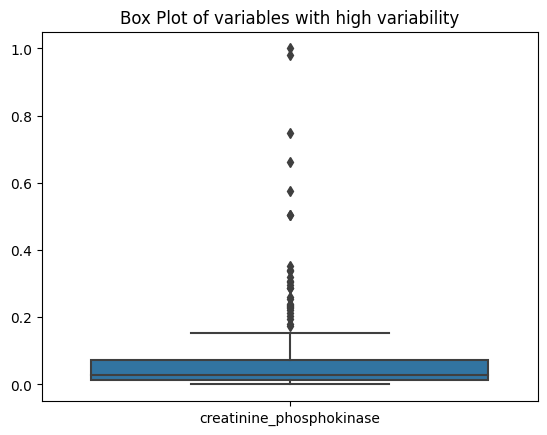

In [25]:
sns.boxplot(data=heart_failure[["creatinine_phosphokinase"]])
plt.title('Box Plot of variables with high variability', loc="center")
# Add a legend for the units of each variable
plt.gca().set_facecolor('none') # para tirar a linhas cizentas

##it looks that this is possible, so perphaps should we leave it? 

Since now I have normalized the data categories, I am going to do hot encoding for the categorical variable, Type of heart failure

In [26]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_heart_failure = pd.DataFrame(encoder.fit_transform(heart_failure[['Type of heart failure']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_heart_failure = heart_failure.join(encoder_heart_failure)

#view final df
print(final_heart_failure)

      age  anaemia  creatinine_phosphokinase  diabetes  \
0    75.0        0                  0.071319         0   
1    55.0        0                  1.000000         0   
2    65.0        0                  0.015693         0   
3    50.0        1                  0.011227         0   
4    65.0        1                  0.017479         1   
..    ...      ...                       ...       ...   
294  62.0        0                  0.004848         1   
295  55.0        0                  0.229268         0   
296  45.0        0                  0.259888         1   
297  45.0        0                  0.304925         0   
298  50.0        0                  0.022072         0   

                                 Type of heart failure  ejection_fraction  \
0         Heart Failure with reduced ejection fraction                 20   
1         Heart Failure with reduced ejection fraction                 38   
2         Heart Failure with reduced ejection fraction                 2

In [27]:
#drop 'team' column
final_heart_failure.drop('Type of heart failure', axis=1, inplace=True)

#view final df
print(final_heart_failure)


      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                  0.071319         0                 20   
1    55.0        0                  1.000000         0                 38   
2    65.0        0                  0.015693         0                 20   
3    50.0        1                  0.011227         0                 20   
4    65.0        1                  0.017479         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                  0.004848         1                 38   
295  55.0        0                  0.229268         0                 38   
296  45.0        0                  0.259888         1                 60   
297  45.0        0                  0.304925         0                 38   
298  50.0        0                  0.022072         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

Should I transform binary categories for preparation to use neural networks?
Sould I make the scale the data of all data set before start modeling with neural networks?

Whether or not to transform binary categories and whether to scale the entire dataset before modeling with neural networks depend on several factors, including the specific neural network architecture you plan to use, the nature of your data, and your research question. Here are some general considerations:

Binary categories: In general, binary categories do not need to be transformed before using them as inputs for a neural network. You can represent them as 0s and 1s, or use a one-hot encoding scheme to represent them as multiple binary variables (e.g., if you have a categorical variable with three categories, you can represent it as three binary variables, one for each category). One-hot encoding can be useful if you want to provide more explicit information to the neural network about the categories and their relationships.

Scaling the data: In many cases, it's a good idea to scale the data before using it for neural network training, as this can help improve the stability and convergence of the training process. Scaling can also help avoid numerical overflow or underflow issues, particularly if you are using activation functions that saturate at large or small values (e.g., sigmoid, tanh). However, the specific scaling method you use depends on the nature of your data and the neural network architecture you plan to use. Some common scaling methods include min-max scaling, standardization, and normalization based on the median absolute deviation (MAD).

Scaling the entire dataset: Whether to scale the entire dataset or only a subset of features depends on the specific characteristics of your data and your research question. In general, it's a good idea to scale all features that are expected to have similar scales and ranges, and to leave out features that are expected to be inherently different (e.g., categorical variables, variables measured in different units). However, keep in mind that scaling can affect the interpretation of the results, particularly if you are using a neural network for prediction or classification. In these cases, you may want to retain the original scaling information or provide additional information about the scaling method used.

In summary, it's important to carefully consider the specific requirements of your neural network and the characteristics of your data before deciding on a transformation or scaling method. It's often helpful to experiment with different approaches and evaluate their performance on a held-out validation set to identify the most effective approach.

Plan: Maybe I leave it like this for now.

In [28]:
#Convert variables from float to interger

# displaying the datatypes
display(heart_failure.dtypes)
  
# converting 'Weight' from float to int
heart_failure['serum_creatinine'] = heart_failure['serum_creatinine'].astype(int)
heart_failure['age'] = heart_failure['age'].astype(int) 
heart_failure['creatinine_phosphokinase'] = heart_failure['creatinine_phosphokinase'].astype(int)
heart_failure['platelets'] = heart_failure['platelets'].astype(int)

# displaying the datatypes
display(heart_failure.dtypes)

age                          float64
anaemia                        int64
creatinine_phosphokinase     float64
diabetes                       int64
Type of heart failure       category
ejection_fraction              int64
high_blood_pressure            int64
platelets                    float64
serum_creatinine             float64
serum_sodium                   int64
sex                            int64
smoking                        int64
time                           int64
DEATH_EVENT                    int64
dtype: object

age                            int32
anaemia                        int64
creatinine_phosphokinase       int32
diabetes                       int64
Type of heart failure       category
ejection_fraction              int64
high_blood_pressure            int64
platelets                      int32
serum_creatinine               int32
serum_sodium                   int64
sex                            int64
smoking                        int64
time                           int64
DEATH_EVENT                    int64
dtype: object

In [29]:
#drop heart failure
heart_failure = heart_failure.drop(columns=['Type of heart failure'])

In [30]:
## split the data into independent and dependent variable
X = heart_failure.iloc[:, :-1].values #all variables in dataset except DEATH_EVENT
y = heart_failure.iloc[:, -1].values #variable DEATH_EVENT

In [31]:
heart_failure.iloc[:, :-1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75,0,0,0,20,1,0,1,130,1,0,4
1,55,0,1,0,38,0,0,1,136,1,0,6
2,65,0,0,0,20,0,0,1,129,1,1,7
3,50,1,0,0,20,0,0,1,137,1,0,7
4,65,1,0,1,20,0,0,2,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,0,1,38,1,0,1,143,1,1,270
295,55,0,0,0,38,0,0,1,139,0,0,271
296,45,0,0,1,60,0,0,0,138,0,0,278
297,45,0,0,0,38,0,0,1,140,1,1,280


In [32]:
heart_failure.iloc[:, -1]

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [33]:
## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 32)


Multi LAYER Preceptron

In [34]:
## Neural Network
## initialise the NN

model = Sequential()


In [35]:
##set up the layers
## input layer
model.add(Dense(units= 125, kernel_initializer= 'uniform', activation = 'relu', input_dim = 12))
## hidden layer
model.add(Dense(units= 125, kernel_initializer= 'uniform', activation = 'relu'))
##regularization
model.add(Dropout(0.2))
##output layer
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid'))

## compiling the ANN
#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile( loss ='binary_crossentropy', metrics = ['accuracy'], optimizer= 'adam') 

#optimizer can be changed, normally best is Adam, but you can try https://keras.io/api/optimizers/adam/

If i wanted to save the best model of training instead of the last one, 

#early_stop and ModelCheckpoint
callbacks  = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 30, mode='max', min_delta=0),
              keras.callbacks.ModelCheckpoint("history_model_simple.keras", monitor='val_loss', save_best_only=True, mode='max')]

#### Improving accuracy of the model
The key once you have the first result is the changing the parameters so you can improve accuracy.

the numbers of hien layers and neurons are not the only hyperparameters you can tweat in an MLP. 

You can also:

Improve Learning rate:
most important hyperparameter. In general, the optimumal learning rate is about half of the meximum learning rate.
Start with a lower learning rate and then gradually increase uo to a very large value (e.g 10)

Optimizer:
quite important , see chapter 11

BATCH size:
-can have a significant impact on your models performance and training time.
-Using small batches (from  2 to 32) was preferable because small batches led to better models and less training times.

Activation function:ReLU activation function should be a good default for all hidden layers

Number of iterations: does not need to be tweakd. 

DON'T FORGET TO CLEAR ALL THE OUTPUTSAND THEN RUN ALL EACH TIME

Test 1: history = model.fit(X_train, y_train, batch_size = 32, epochs = 340, validation_split= 0.30) : accuracy 0.86, model adam optimizer

Test 2: history = model.fit(X_train, y_train, batch_size = 28, epochs = 355, validation_split= 0.30): accuracy 0.80, aroc 0.74, model adam optimizer

Test 3: history = model.fit(X_train, y_train, batch_size = 32, epochs = 355, validation_split= 0.30) accuracy 0.85 , aroc 0.83, model adam optimizer

Test 4:history = model.fit(X_train, y_train, batch_size = 32, epochs = 360, validation_split= 0.30) accuracy 0.82  , aroc 76, model adam optimizer

Test 5:history = model.fit(X_train, y_train, batch_size = 32, epochs = 355, validation_split= 0.30) accuracy 0.87, aroc 83, model adam optimizer




In [36]:
## train the model
history = model.fit(X_train, y_train, batch_size = 32, epochs = 40, validation_split= 0.30)



Epoch 1/40
6/6 [==============================] - 1s 27ms/step - loss: 0.5696 - accuracy: 0.7365 - val_loss: 0.4538 - val_accuracy: 0.8056
Epoch 2/40
6/6 [==============================] - 0s 5ms/step - loss: 0.4740 - accuracy: 0.8383 - val_loss: 0.4430 - val_accuracy: 0.7917
Epoch 3/40
6/6 [==============================] - 0s 5ms/step - loss: 0.4578 - accuracy: 0.8204 - val_loss: 0.4222 - val_accuracy: 0.8472
Epoch 4/40
6/6 [==============================] - 0s 5ms/step - loss: 0.4366 - accuracy: 0.8383 - val_loss: 0.4132 - val_accuracy: 0.8194
Epoch 5/40
6/6 [==============================] - 0s 5ms/step - loss: 0.4236 - accuracy: 0.8563 - val_loss: 0.4173 - val_accuracy: 0.8611
Epoch 6/40
6/6 [==============================] - 0s 5ms/step - loss: 0.4119 - accuracy: 0.8563 - val_loss: 0.3999 - val_accuracy: 0.8472
Epoch 7/40
6/6 [==============================] - 0s 5ms/step - loss: 0.4002 - accuracy: 0.8563 - val_loss: 0.3916 - val_accuracy: 0.8472
Epoch 8/40
6/6 [=================

In [37]:
# Plot train loss and validation loss
def plot_loss (history):
    fig, ax = plt.subplots(figsize = (15,6))
    ax.plot(history.history['loss'],color="#004C99")
    ax.plot(history.history['val_loss'],color="#D96552")
    #ax.set_facecolor("#D3D3D3")
    plt.grid(b=False,axis = 'y')
    ax.grid(b=False,axis = 'y')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right',prop={'size': 15})

C:\Users\jlapa\AppData\Local\Temp\ipykernel_13740\2983302842.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False,axis = 'y')
C:\Users\jlapa\AppData\Local\Temp\ipykernel_13740\2983302842.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=False,axis = 'y')


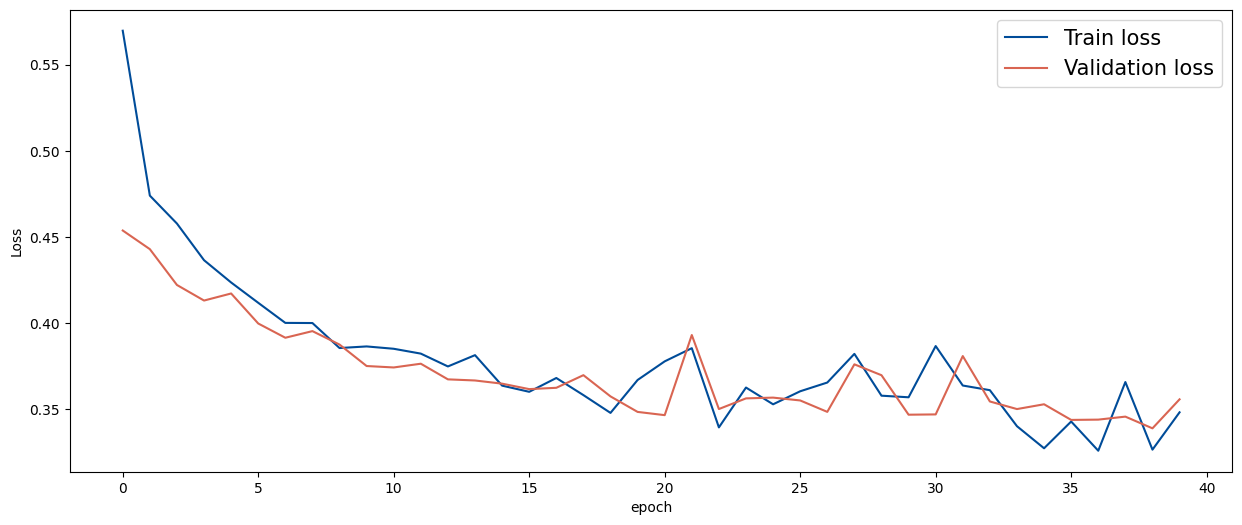

In [38]:
plot_loss (history)

In [39]:
## make prediction
y_pred_hf = model.predict(X_test)
y_pred_hf = np.where(y_pred_hf > 0.5, 1, 0) # on binary put between 0 and 1, othrwise it will predict a float number

2/2 [==============================] - 0s 2ms/step


In [40]:
print(y_test.shape)
print(y_pred_hf.shape)

(60,)
(60, 1)


In [41]:
y_pred_hf = y_pred_hf.flatten()

In [42]:
print(y_test.shape)
print(y_pred_hf.shape)

(60,)
(60,)


In [43]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_hf})

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [44]:
##classification report
print(classification_report(y_test, y_pred_hf))



              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.78      0.74      0.76        19

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60



In [45]:
cm = confusion_matrix(y_test, y_pred_hf)
cm

array([[37,  4],
       [ 5, 14]], dtype=int64)

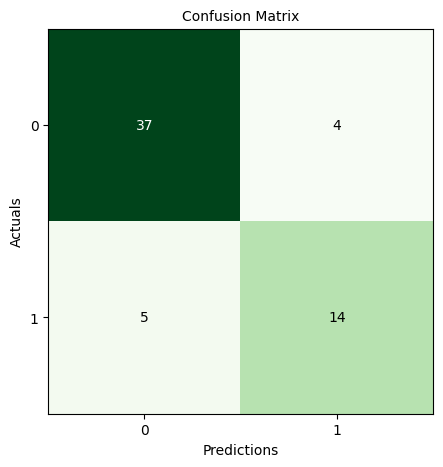

In [46]:
## plot a confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5, 5), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [47]:
auc = roc_auc_score(y_test, y_pred_hf)
print('AUC: %f' %auc)

AUC: 0.819641


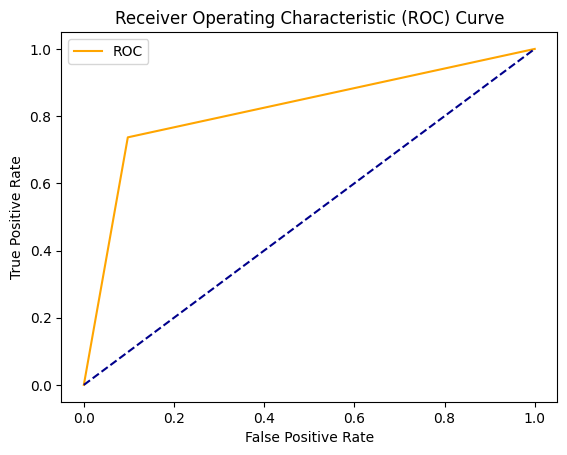

In [48]:
fpr, tpr = roc_curve(y_test, y_pred_hf)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [49]:
##save the model
model.save('mortality_heart_failure_model')

2023-02-23 14:41:20.017 WARNING absl: Found untraced functions such as _update_step_xla while saving (showing 1 of 1). These functions will not be directly callable after loading.


INFO:tensorflow:Assets written to: mortality_heart_failure_model\assets


2023-02-23 14:41:20.187 INFO    tensorflow: Assets written to: mortality_heart_failure_model\assets


In [51]:
##save the NN Model
import pickle # file that contains binary representation

##save the model to a file
with open ('neural_network_model.pkl','wb') as file:
    pickle.dump(history, file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-23 14:44:54         2070
metadata.json                                  2023-02-23 14:44:54           64
variables.h5                                   2023-02-23 14:44:54       233480


In [52]:
# Creating our streamlit application
#only suuports py files 

In [54]:
#convert text to numerical values 
word_to_index = {word: index for index, word in enumerate(heart_failure.columns[:-1])}
word_to_index

{'age': 0,
 'anaemia': 1,
 'creatinine_phosphokinase': 2,
 'diabetes': 3,
 'ejection_fraction': 4,
 'high_blood_pressure': 5,
 'platelets': 6,
 'serum_creatinine': 7,
 'serum_sodium': 8,
 'sex': 9,
 'smoking': 10,
 'time': 11}